## Final Spring 2023

### Data Generation

- python datageneration.py "Yilun Wu" "." 

- Writing Random Values for Qihang Ma into .

- Hashed Name:  7b8449b9dcbacd4fe5537e2a5211ca1569bf9f77

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.api as sm
from scipy.stats import t, norm, kurtosis, skew
from scipy.optimize import fsolve, minimize

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: sys.path.append(module_path)
from lib.riskmgmt import return_calculate, is_psd, GBSM, compute_VaR, compute_ES, max_sharpe_ratio_portfolio, risk_budget, risk_parity_portfolio, expost_attribution, multi_norm_sim

### Problem 1

Using the data in “problem1.csv”
- a. Calculate Log Returns (2pts)

- b. Calculate Pairwise Covariance (4pt)

- c. Is this Matrix PSD? If not, fix it with the “near_psd” method (2pt) 

- d. Discuss when you might see data like this in the real world. (2pt)

In [2]:
problem1Data = pd.read_csv('problem1.csv')
problem1Data

,Price1,Price2,Price3,Date
0,102.826412,94.650195,98.743159,2023-11-27
1,NaN,94.790948,100.022901,2023-11-28
2,102.785907,NaN,NaN,2023-11-29
3,102.847258,96.056428,98.541876,2023-11-30
4,102.818215,94.861366,97.983723,2023-12-01
5,NaN,NaN,98.458978,2023-12-02
6,102.829005,94.108024,98.650071,2023-12-03
7,102.920044,94.206004,NaN,2023-12-04
8,102.848208,94.611114,99.883936,2023-12-05
9,102.642653,96.234730,99.904116,2023-12-06


#### (a) Calculate Log Returns

In [3]:
problem1Return = return_calculate(problem1Data, method='LOG').drop('Date',axis=1)
problem1Return

,Price1,Price2,Price3
0,NaN,0.001486,0.012877
1,NaN,NaN,NaN
2,0.000597,NaN,NaN
3,-0.000282,-0.012519,-0.005680
4,NaN,NaN,0.004839
5,NaN,NaN,0.001939
6,0.000885,0.001041,NaN
7,-0.000698,0.004291,NaN
8,-0.002001,0.017015,0.000202
9,0.001087,-0.008410,-0.019604


#### (b) Calculate Pairwise Covariance

In [4]:
pairwise_cov = problem1Return.cov()
pairwise_cov

,Price1,Price2,Price3
Price1,9.983249e-07,0.000003,0.000003
Price2,2.985551e-06,0.000501,0.000112
Price3,2.997105e-06,0.000112,0.000217


#### (c) Is this Matrix PSD? If not, fix it with the “near_psd” method

In [5]:
isPSD = is_psd(pairwise_cov)
print(f'Is pairwise covariance matrix positive semi-definite? {isPSD}')

Is pairwise covariance matrix positive semi-definite? True


#### (d) Discuss when you might see data like this in the real world. 

Every market may have different holiday schedule, and the number of trading days may be different. For example, the US market has 252 trading days per year, while the Chinese market has 242 trading days per year. Therefore, these different schedules will result in missing data points. In addition, the data may be missing due to other reasons, such as the data is not available or the data is not recorded. 

## Problem 2

“problem2.csv” contains data about a call option. Time to maturity is given in days. Assume 255 days in a year.

- a. Calculate the call price (1pt)

- b. Calculate Delta (1pt)

- c. Calculate Gamma (1pt)

- d. Calculate Vega (1pt)

- e. Calculate Rho (1pt)

Assume you are long 1 share of underlying and are short 1 call option. Using Monte Carlo assuming a Normal distribution of arithmetic returns where the implied volatility is the annual volatility and 0 mean

- f. Calculate VaR at 5% (2pt)

- g. Calculate ES at 5% (2pt)

- h. This portfolio’s payoff structure most closely resembles what? (1pt)

In [6]:
problem2Data = pd.read_csv('problem2.csv')
problem2Data

,Underlying,Strike,IV,TTM,RF,DivRate
0,85.084564,74.575976,0.22,148,0.045,0.04477


In [7]:
S = problem2Data['Underlying'].values[0]
X = problem2Data['Strike'].values[0]
T = problem2Data['TTM'].values[0]/255 # Assume 255 days in a year
sigma = problem2Data['IV'].values[0]
r = problem2Data['RF'].values[0]
q = problem2Data['DivRate'].values[0]
b = r-q

gbsm = GBSM(S, X, T, sigma, r, b, 'Call')
allGreeks = gbsm.getAllGreeks()

In [8]:
allGreeks

{'delta': 0.7874321666656353,
 'gamma': 0.01865096890329624,
 'vega': 17.240393318915274,
 'theta': -2.749938871463854,
 'rho': -6.8743101236576365,
 'carry_rho': 38.885300960213534}

#### (a) Calculate the call price

In [9]:
call_price = gbsm.black_scholes()
call_price

11.84425055089661

#### (b) Calculate Delta

In [10]:
allGreeks['delta']

0.7874321666656353

#### (c) Calculate Gamma

In [11]:
allGreeks['gamma']

0.01865096890329624

#### (d) Calculate Vega

In [12]:
allGreeks['vega']

17.240393318915274

#### (e) Calculate Rho 

In [13]:
allGreeks['rho']

-6.8743101236576365

In [14]:
T1 = (problem2Data['TTM'].values[0]-1)/255
VaRs = []
ESs = []
dfs = []

for i in range(1000):

    np.random.seed(i)
    sim_r = np.random.normal(size=10000, loc=0, scale=sigma/np.sqrt(255))
    sim_price = pd.DataFrame((1+sim_r)*S, columns=['Price'])
    sim_price['PnL'] = sim_price.apply(lambda x:call_price-GBSM(x, X, T1, sigma, r, b, 'Call').black_scholes()+x-S)

    VaRs.append(compute_VaR(sim_price['PnL']))
    ESs.append(compute_ES(sim_price['PnL']))
    # dfs.append(simulation.Fitting_t_MLE(sim_price['PnL'])[0])

VaRs = np.array(VaRs)
ESs = np.array(ESs)

#### (f) Calculate VaR at 5%

In [15]:
np.mean(VaRs)

0.43369443930296225

#### (g) Calculate ES at 5%

In [16]:
np.mean(ESs)

0.5609963400898326

#### (h) This portfolio’s payoff structure most closely resembles what?

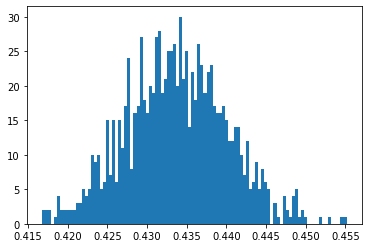

In [17]:
plt.hist(VaRs, bins=100)
plt.show()

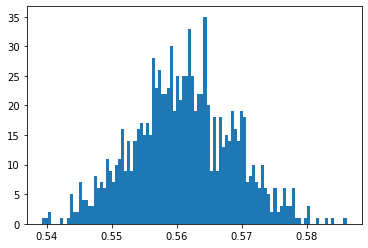

In [18]:
plt.hist(ESs, bins=100)
plt.show()

This portfolio’s payoff structure most closely resembles normal distribution.

## Problem 3

Data in “problem3_cov.csv” is the covariance for 3 assets. “problem3_ER.csv” is the expected return for each asset as well as the risk free rate.

- a. Calculate the Maximum Sharpe Ratio Portfolio (4pt)

- b. Calculate the Risk Parity Portfolio (4pt)

- c. Compare the differences between the portfolio and explain why. (2pt)

In [19]:
problem3_cov = pd.read_csv('problem3_cov.csv')
problem3_cov

,Asset1,Asset2,Asset3
0,0.030762,0.032588,0.030260
1,0.032588,0.058226,0.041631
2,0.030260,0.041631,0.050203


In [20]:
problem3_ER = pd.read_csv('problem3_ER.csv')
problem3_ER

,RF,Expected_Value_1,Expected_Value_2,Expected_Value_3
0,0.045,0.142578,0.179248,0.169656


In [21]:
assets = problem3_cov.columns.to_list()
expectedReturn = problem3_ER.values[0, 1:]
rf = problem3_ER['RF'].values[0]

#### (a) Calculate the Maximum Sharpe Ratio Portfolio

- With the constrain of positive weights

In [22]:
solved = max_sharpe_ratio_portfolio(expectedReturn, problem3_cov, rf)
superEfficientPortfolio = pd.DataFrame(index=problem3_cov.index)
superEfficientPortfolio['Stock'] = assets
superEfficientPortfolio['Weight'] = solved.x
superEfficientPortfolio['Rist Budget'] = risk_budget(superEfficientPortfolio['Weight'].values, problem3_cov)
superEfficientPortfolio

,Stock,Weight,Rist Budget
0,Asset1,0.398464,0.333333
1,Asset2,0.289620,0.333328
2,Asset3,0.311915,0.333339


#### 3.2 Calculate the Risk Parity Portfolio

In [23]:
solved = risk_parity_portfolio(problem3_cov)
riskParityPortfolio = pd.DataFrame(index=problem3_cov.index)
riskParityPortfolio['Stock'] = assets
riskParityPortfolio['Weight'] = solved.x
riskParityPortfolio['Rist Budget'] = risk_budget(riskParityPortfolio['Weight'].values, problem3_cov)
riskParityPortfolio

,Stock,Weight,Rist Budget
0,Asset1,0.398469,0.333338
1,Asset2,0.289621,0.333329
2,Asset3,0.311910,0.333334


#### 3.3 Compare the differences between the portfolio and explain why.

They are pretty close, which indicates that risk parity is the maximum sharpe ratio portfolio

## Problem 4 

Data in “problem4_returns.csv” is a series of returns for 3 assets.“problem4_startWeight.csv” is the starting weights of a portfolio of these assets as of the first day in the return series.

- a. Calculate the new weights for the start of each time period (2pt)

- b. Calculate the ex-post return attribution of the portfolio on each asset (4pt)

- c. Calculate the ex-post risk attribution of the portfolio on each asset (2pt)

In [24]:
problem4_returns = pd.read_csv('problem4_returns.csv', index_col='Date')
problem4_returns.index = pd.to_datetime(problem4_returns.index)
problem4_returns

,Asset1,Asset2,Asset3
Date,,,
2023-11-27,0.046068,-0.032202,0.014257
2023-11-28,-0.023194,-0.046872,-0.111182
2023-11-29,-0.050231,0.059837,0.040725
2023-11-30,0.036076,-0.090296,0.012209
2023-12-01,0.100931,-0.070695,0.091792
2023-12-02,0.014710,-0.037476,-0.047690
2023-12-03,0.063060,0.067567,-0.098910
2023-12-04,0.058541,-0.021782,-0.077361
2023-12-05,-0.084534,-0.007757,0.008457


In [25]:
problem4_startWeight = pd.read_csv('problem4_startWeight.csv')
problem4_startWeight

,weight1,weight2,weight3
0,0.429088,0.284605,0.286308


#### (a) Calculate the new weights for the start of each time period

In [26]:
assets = problem4_returns.columns.to_list()
n = problem4_returns.shape[0]
startWeights = problem4_startWeight.values[0]
weights = np.empty((n+1, len(startWeights)))
lastW = np.copy(startWeights)
matReturns = problem4_returns[assets].values
portfolioReturns = []
for i in range(n):
    # Save Current Weights in Matrix
    weights[i, :] = lastW
    # Update Weights by return
    lastW = lastW * (1.0 + matReturns[i, :])
    # Portfolio return is the sum of the updated weights
    pR = np.sum(lastW)
    # Normalize the wieghts back so sum = 1
    lastW = lastW / pR
    portfolioReturns.append(pR-1)
weights[n, :] = lastW
weights = weights[1:, :] # remove original weights
weights = pd.DataFrame(weights, columns=assets, index=problem4_returns.index)
weights.index = pd.to_datetime(weights.index)
weights

,Asset1,Asset2,Asset3
Date,,,
2023-11-27,0.442359,0.271454,0.286187
2023-11-28,0.457152,0.273731,0.269117
2023-11-29,0.432297,0.288847,0.278856
2023-11-30,0.451087,0.264639,0.284274
2023-12-01,0.471658,0.233571,0.294771
2023-12-02,0.486315,0.228444,0.285241
2023-12-03,0.507897,0.239593,0.252510
2023-12-04,0.534966,0.233213,0.231821
2023-12-05,0.512858,0.242326,0.244816


#### (b) Calculate the ex-post return attribution of the portfolio on each asset

In [27]:
res = expost_attribution(startWeights, problem4_returns)
res

,Value,Asset1,Asset2,Asset3,Portfolio
0,TotalReturn,0.629554,-0.060875,-0.210485,0.192545
1,Return Attribution,0.276461,-0.019145,-0.064771,0.192545
2,Vol Attribution,0.021414,0.008023,0.006717,0.036153


#### (c) Calculate the ex-post risk attribution of the portfolio on each asset

## Problem 5

Input prices in “problem5.csv” are for a portfolio. You hold 1 share of each asset. Using arithmetic returns, fit a generalized T distribution to each asset return series. Using a Gaussian Copula:

- a. Calculate VaR (5%) for each asset (3pt)

- b. Calculate VaR (5%) for a portfolio of Asset 1 & 2 and a portfolio of Asset 3 & 4 (4pt)

- c. Calculate VaR (5%) for a portfolio of all 4 assets. (3pt)

In [28]:
problem5Data = pd.read_csv('problem5.csv')
problem5Data

,Price1,Price2,Price3,Price4,Date
0,113.563287,90.214242,87.902690,86.019212,2023-10-17
1,113.598744,90.262135,87.934787,86.100403,2023-10-18
2,113.557171,90.243177,87.920747,86.075378,2023-10-19
3,113.583375,90.283311,87.946214,86.106192,2023-10-20
4,113.527290,90.224765,87.904786,86.036960,2023-10-21
...,...,...,...,...,...
56,113.588745,90.264352,87.931956,86.083647,2023-12-12
57,113.550156,90.255804,87.925461,86.088116,2023-12-13
58,113.544737,90.252210,87.911918,86.042667,2023-12-14
59,113.569874,90.264677,87.918320,86.078203,2023-12-15


In [35]:
problem5Returns = return_calculate(problem5Data)
problem5Returns.drop('Date', axis=1, inplace=True)
problem5Returns

,Price1,Price2,Price3,Price4
0,0.000312,0.000531,3.651351e-04,0.000944
1,-0.000366,-0.000210,-1.596602e-04,-0.000291
2,0.000231,0.000445,2.896642e-04,0.000358
3,-0.000494,-0.000648,-4.710679e-04,-0.000804
4,0.000621,0.000289,2.355519e-04,0.000437
5,-0.000158,0.000131,1.161795e-04,0.000373
6,0.000043,-0.000074,-1.079636e-04,-0.000362
7,0.000061,0.000177,1.009179e-04,0.000131
8,-0.000107,-0.000350,-8.851294e-05,0.000022
9,0.000472,0.000326,4.187406e-04,0.000057


In [46]:
# current price
prices = problem5Data.drop('Date', axis=1).tail(1).values[0]
prices

array([113.60346886,  90.26744128,  87.95177101,  86.08062286])

In [47]:
def gaussian_copula(returns, num_samples=10000):
    np.random.seed(545)
    assets = returns.columns.to_list()
    n = returns.shape[0]
    return_t_cdf = [] # t-distribution CDF of returns
    params = [] # parameters of the fitted t-distribution
    for col in returns.columns:
        df, loc, scale = t.fit(returns[col].values)
        params.append((df, loc, scale))
        return_t_cdf.append(t.cdf(returns[col].values, df=df, loc=loc, scale=scale).tolist())
    return_t_cdf = pd.DataFrame(return_t_cdf).T
    return_corr = return_t_cdf.corr(method='spearman')
    sim_t_dist = pd.DataFrame(multi_norm_sim(return_corr, num_samples=num_samples, sim='PCA'))
    sim_t_cdf = []
    for col in sim_t_dist.columns:
        sim_t_cdf.append(norm.cdf(sim_t_dist[col].values, loc=0, scale=1).tolist())
    return_sim_t =[]
    for i in range(len(sim_t_cdf)):
        return_sim_t.append(t.ppf(sim_t_cdf[i], df=params[i][0], loc=params[i][1], scale=params[i][2]))
    return_sim_t = pd.DataFrame(return_sim_t).T
    return_sim_t.columns = assets
    return return_sim_t

In [48]:
return_sim_t = gaussian_copula(problem5Returns)
return_sim_t

,Price1,Price2,Price3,Price4
0,0.000323,0.000356,0.000297,0.000450
1,0.000326,-0.000011,0.000014,0.000166
2,-0.000073,0.000137,0.000106,0.000917
3,-0.000315,-0.000161,-0.000553,-0.000384
4,-0.000055,0.000033,-0.000143,-0.000069
...,...,...,...,...
9995,-0.000051,0.000046,0.000084,0.000237
9996,0.000020,-0.000315,-0.000059,-0.000162
9997,-0.000253,0.000051,0.000058,0.000186
9998,-0.000450,-0.000509,-0.000225,-0.000296


#### (a) Calculate VaR for each asset

In [50]:
assets = problem5Returns.columns.to_list()
for i in range(len(assets)):
    asset = assets[i]
    VaR = compute_VaR(return_sim_t[asset])
    VaRDollar = compute_VaR(return_sim_t[asset]*prices[i])
    print(f"VaR (5%) = {VaR} (${VaRDollar}) for {asset}")

VaR (5%) = 0.0007560145553838801 ($0.08588587600114447) for Price1
VaR (5%) = 0.000517693078396212 ($0.04673082955457197) for Price2
VaR (5%) = 0.0004899802480304366 ($0.04309463057463212) for Price3
VaR (5%) = 0.0006997863810655118 ($0.06023804755153972) for Price4


#### (b) Calculate VaR for a portfolio of Asset 1 & 2 and a portfolio of Asset 3 & 4

In [51]:
assets = [problem5Returns.columns.to_list()[:2], problem5Returns.columns.to_list()[2:]]
for i in range(len(assets)):
    asset = assets[i]
    VaR = compute_VaR(return_sim_t[asset])
    VaRDollar = compute_VaR(return_sim_t[asset]@prices[i:i+2])
    print(f"VaR (5%) = {VaR} (${VaRDollar}) for {asset}")

VaR (5%) = 0.0006555344701905997 ($0.12954823489388062) for ['Price1', 'Price2']
VaR (5%) = 0.0006024043003013327 ($0.10259160269676412) for ['Price3', 'Price4']


#### (c) Calculate VaR for the whole portfolio

In [52]:
VaR = compute_VaR(return_sim_t)
VaRDollar = compute_VaR(return_sim_t@prices)
print(f"VaR (5%) = {VaR} (${VaRDollar}) for the whole portfolio")

VaR (5%) = 0.0006293638861093962 ($0.22165848595133944) for the whole portfolio
